### Importing libraries and checking data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
start_date = '1990-01-01'
end_date = '2024-08-1'

# Company to check
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date, group_by=ticker, auto_adjust=False)[ticker]
data = data.reset_index()
fig = px.line(data, x='Date', y=['Open', 'High', 'Low', 'Close'])


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847 entries, 0 to 6846
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6847 non-null   datetime64[ns]
 1   Open       6847 non-null   float64       
 2   High       6847 non-null   float64       
 3   Low        6847 non-null   float64       
 4   Close      6847 non-null   float64       
 5   Adj Close  6847 non-null   float64       
 6   Volume     6847 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 374.6 KB


In [5]:
# data = data.set_index('Date')

# data.head()

### Graph Visualization

Text(0.5, 1.0, 'Amazon Opening Stock Value')

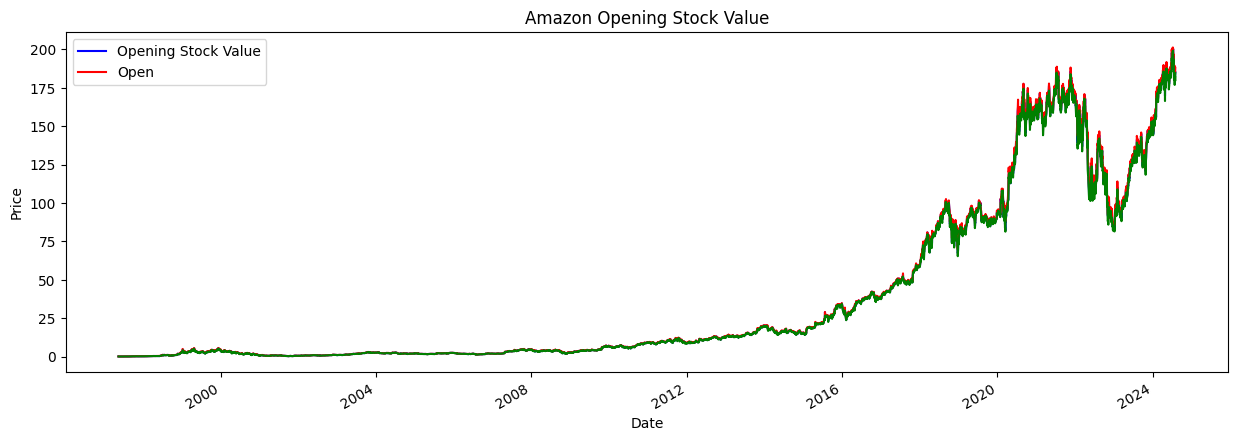

In [6]:
data.plot(x='Date', y=['Open', 'High', 'Low'], figsize=(15, 5),
          color=['blue', 'red', 'green'])


plt.legend(['Opening Stock Value', 'Open'])
plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Amazon Opening Stock Value")

In [7]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high = data['High'],
                                     low = data['Low'],
                                     close = data['Close'])])
fig.update_layout(title='AMZN Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

# Display the figure
fig.show()

In [8]:
# SMA Simple Moving Average
# Number of days to calculate SMA
window_size = 5

# Calculate the Simple Moving Average
data['Simple Moving Average'] = data['Close'].rolling(window=window_size).mean()

data.head()


Price,Date,Open,High,Low,Close,Adj Close,Volume,Simple Moving Average
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,NaN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,NaN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,NaN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.084583


In [9]:
# # Plotting SMA and Closing price

# fig2 = go.Figure(data=[go.Candlestick(x=data['Date'],
#                                     avg = data['Simple Moving Average'],
                                     
#                                     close = data['Close'])])
# fig2.update_layout(title='AMZN Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
# # Display the figure
# fig2.show()

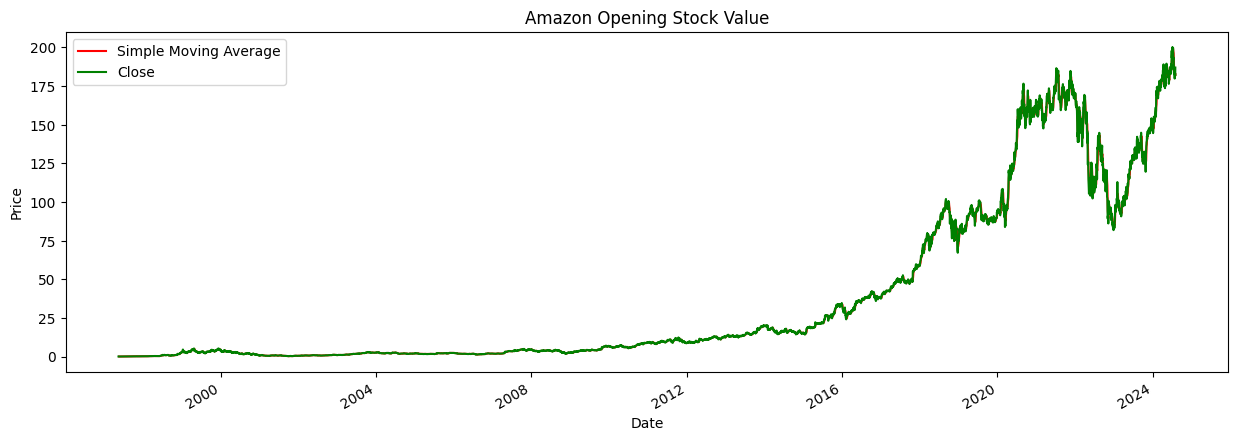

In [32]:
%matplotlib inline
plt.ion()

data.plot(x='Date', y=['Simple Moving Average', 'Close'], figsize=(15, 5),
          color=['red', 'green'])



plt.legend(['Simple Moving Average', 'Close'])
plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Amazon Opening Stock Value")

plt.show()


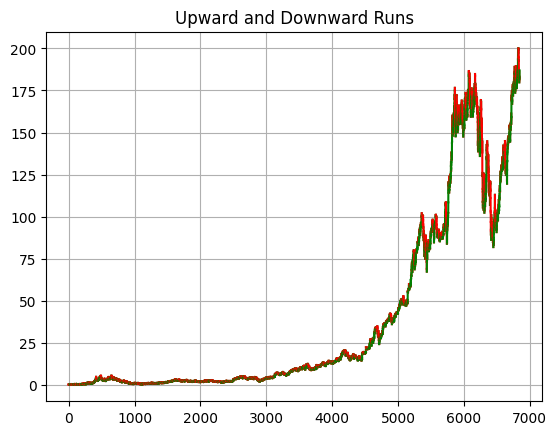

In [40]:
#highlighted upward and downward runs (same as candlestick plot)

colors = []
for i in range(1, len(data)):
    if data['Close'][i] > data['Close'][i - 1]:
        colors.append('green')
    elif data['Close'][i] < data['Close'][i - 1]:
        colors.append('red')
    else:
        colors.append('gray')


          
for i in range(1, len(data)):
    plt.plot([i - 1, i], data['Close'].values[i - 1:i + 1], color=colors[i - 1])
plt.title('Upward and Downward Runs')
plt.grid(True)
plt.show()

In [11]:
# trying out interactive plot with widgets


In [12]:
data['Close'][2] - data['Close'][1]

np.float64(-0.0010409951210021973)

### Finding consecutive upward and downward trends

In [ ]:
# up and down shld be made into lists to store run info, can be improved further
# up = []
# down = []
consec_up = 0
consec_down = 0
max_up = 0
max_down = 0

for i in range(1,len(data)):
    if data['Close'][i]-data['Close'][i-1] > 0:
        consec_up +=1
        consec_down = 0
        print('Consecutive up :', consec_up)
        if consec_up > max_up:
            max_up = consec_up
    else:
        consec_down +=1
        consec_up = 0
        print('Consecutive down :', consec_down)
        if consec_down > max_down:
            max_down = consec_down





Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive down : 4
Consecutive down : 5
Consecutive up : 1
Consecutive up : 2
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive up : 1
Consecutive up : 2
Consecutive up : 3
Consecutive down : 1
Consecutive down : 2
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive up : 2
Consecutive up : 3
Consecutive up : 4
Consecutive up : 5
Consecutive up : 6
Consecutive down : 1
Consecutive down : 2
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive down : 3
Consecutive up : 1
Consecutive down : 1
Consecutive up : 1
Consecutive down : 1
Consecutive down : 2
Consecutive

In [14]:
print('Max upward days is: ', max_up,'days')
print('Max downward days is: ', max_down,'days')

Max upward days is:  10 days
Max downward days is:  10 days


In [27]:
# alternative method but we store the run info in the list

current_run = {'type': None, 'length': 0}
up_runs = []
down_runs = []

for i in range(1, len(data)):
    if data['Close'][i] > data['Close'][i-1]:
        run_type = 'up'
    elif data['Close'][i] < data['Close'][i-1]:
        run_type = 'down'
    else:
        run_type = 'flat'

    if run_type == current_run['type']:
        current_run['length'] += 1
    else:
        if current_run['type'] == 'up':
            up_runs.append(current_run['length'])
        elif current_run['type'] == 'down':
            down_runs.append(current_run['length'])
        current_run = {'type': run_type, 'length': 1 if run_type != 'flat' else 0}

print(max(up_runs))
print(max(down_runs))

10
10


In [ ]:
# Number of times it hit max upward run, can be applied for downward

print(up_runs.count(max(up_runs)))

3


### Simple Daily Returns in %

In [ ]:
# returns = ((today close price - ystd close price)/ystd close price) * 100
# data['Daily Return'] = data['Close'].pct_change()  <---- pct change calculated % change compared to previous value

for i in range(1, len(data)):
    price_diff = (data['Close'][i]-data['Close'][i-1])
    daily_return = (price_diff/data['Close'][i-1]) * 100
    print('Simple daily return for day',i,':',"{:.2f}".format(daily_return),'%')

Simple daily return for day 1 : -11.70 %
Simple daily return for day 2 : -1.20 %
Simple daily return for day 3 : -4.27 %
Simple daily return for day 4 : -12.74 %
Simple daily return for day 5 : -2.19 %
Simple daily return for day 6 : 7.46 %
Simple daily return for day 7 : 5.56 %
Simple daily return for day 8 : -3.29 %
Simple daily return for day 9 : -1.70 %
Simple daily return for day 10 : -0.35 %
Simple daily return for day 11 : 0.69 %
Simple daily return for day 12 : -2.07 %
Simple daily return for day 13 : -4.23 %
Simple daily return for day 14 : 8.82 %
Simple daily return for day 15 : 7.43 %
Simple daily return for day 16 : 1.89 %
Simple daily return for day 17 : -6.17 %
Simple daily return for day 18 : -2.63 %
Simple daily return for day 19 : 4.05 %
Simple daily return for day 20 : -1.30 %
Simple daily return for day 21 : -0.66 %
Simple daily return for day 22 : -4.31 %
Simple daily return for day 23 : 0.35 %
Simple daily return for day 24 : 0.00 %
Simple daily return for day 25 :